
# Twitter Sentiment Analysis Project
---
## Problem Description
With the rise of social media, understanding public sentiment has become increasingly important for businesses, political campaigns, and social movements. Every day, millions of users express their opinions on platforms like Twitter, making it a valuable source for sentiment analysis. By leveraging deep learning, this project seeks to classify the sentiment of tweets as **positive** or **negative**, providing a tool to interpret large-scale public opinion efficiently.

To accomplish this, **Long Short-Term Memory (LSTM) networks** will be utilized, a specialized type of recurrent neural network (RNN) designed to process sequential data effectively. The model will be trained on the **Sentiment140 dataset**, which consists of a large collection of labeled tweets. This dataset enables the development of a supervised learning model capable of understanding the sentiment conveyed in short social media texts.

The project will begin with **data collection and preprocessing**, where tweets will be cleaned and tokenized to prepare them for analysis. Next, **exploratory data analysis (EDA)** will be conducted to identify trends, patterns, and distributions within the dataset. Afterward, an **LSTM-based deep learning model** will be built and trained to classify sentiment accurately. The model’s performance will be evaluated using appropriate metrics, and results will be analyzed to identify strengths and areas for improvement. Finally, findings will be discussed, key takeaways will be summarized, and potential enhancements for future work will be suggested.

By the end of this project, a functional deep learning model capable of accurately classifying the sentiment of tweets will be developed. This tool has practical applications in areas such as customer service monitoring, brand reputation management, and trend analysis, making it a valuable asset in the digital era.


### **Dataset Details**
- **Total Samples**: 1,600,000 tweets
- **Sentiment Labels**: Binary (0 = Negative, 1 = Positive)
- **Features**:
  - **Text**: The content of the tweet.
  - **Sentiment**: The sentiment label (0 = Negative, 1 = Positive).
  - **Other Metadata**: Includes tweet ID, timestamp, and user information (not used for modeling).

### **Citation**
Go, A., Bhayani, R., & Huang, L. (2009). **Twitter Sentiment Classification using Distant Supervision**. Stanford University. Retrieved from https://www.kaggle.com/kazanova/sentiment140

## Exploratory Data Analysis (EDA)
Analyzing sentiment distribution and frequently used words helps reveal underlying patterns and potential biases in the dataset. Visualizing sentiment balance provides insights into trends, outliers, and possible class imbalances. Identifying common words within each sentiment category helps uncover key themes and associations. Preprocessing steps such as tokenization, stopword removal, and text normalization improve data quality, reducing noise and enhancing model performance. These insights guide feature selection and ensure that the deep learning model effectively captures meaningful sentiment patterns.



In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

# View first few rows
print(data.head())

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Corem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Corem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


        sentiment                                               text
541200          0             @chrishasboobs AHHH I HOPE YOUR OK!!! 
750             0  @misstoriblack cool , i have no tweet apps  fo...
766711          0  @TiannaChaos i know  just family drama. its la...
285055          0  School email won't open  and I have geography ...
705995          0                             upper airways problem 


C:\Users\Corem\AppData\Local\Temp\ipykernel_18672\151454276.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='coolwarm')


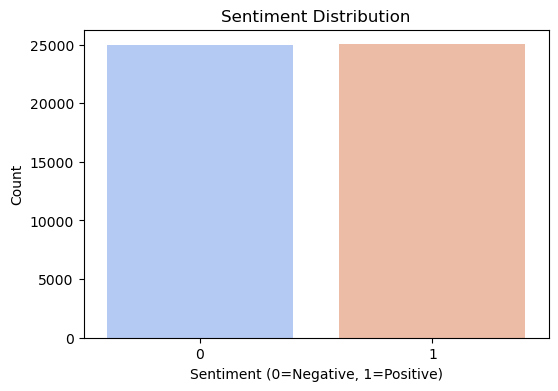

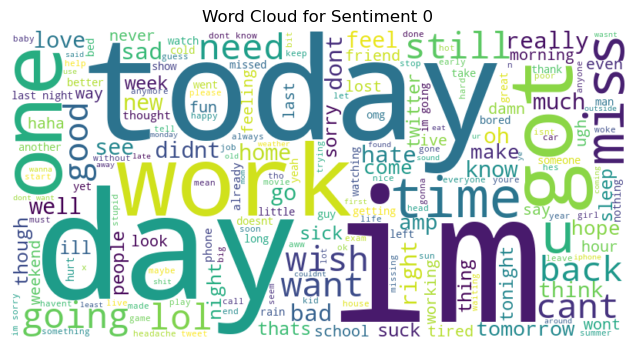

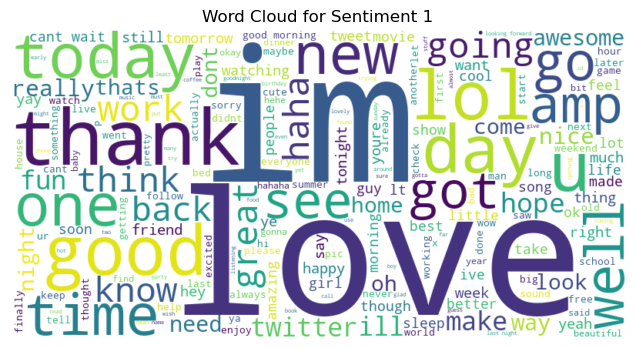

C:\Users\Corem\AppData\Local\Temp\ipykernel_18672\151454276.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


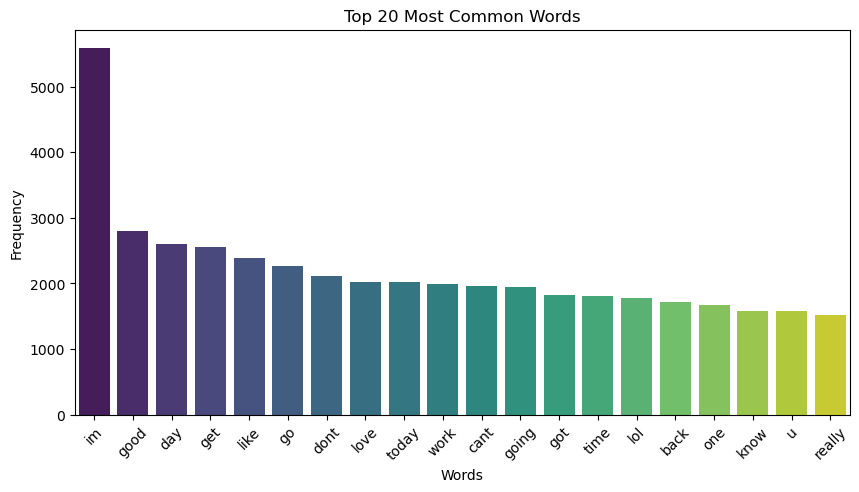

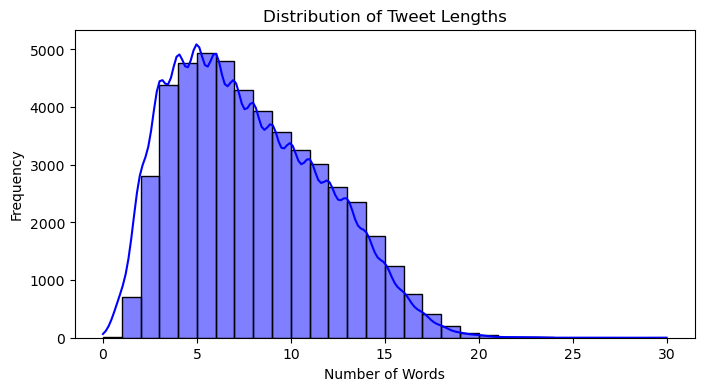

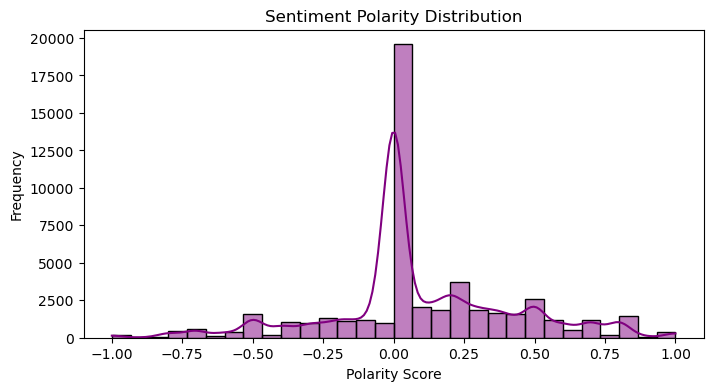

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')

# Load dataset 
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
data = data.sample(50000, random_state=42)  # Reduce dataset size

# column names
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

#  relevant columns
data = data[['sentiment', 'text']]

# Convert sentiment labels (0 -> Negative, 4 -> Positive)
data['sentiment'] = data['sentiment'].replace({0: 0, 4: 1})

# View first few rows
print(data.head())

# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply text cleaning
data['clean_text'] = data['text'].apply(clean_text)

# Generate word clouds for each sentiment using a smaller sample
for sentiment in [0, 1]:
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['clean_text'].sample(10000, random_state=42))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Sentiment {sentiment}")
    plt.show()

# Tokenize words using optimized method
data['tokens'] = data['clean_text'].str.split()

# Flatten token lists and count word frequencies
all_words = [word for tokens in data['tokens'] for word in tokens]
word_counts = Counter(all_words)

# Plot top 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Sentence length distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['clean_text'].str.split().apply(len), bins=30, kde=True, color='blue')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Sentiment polarity analysis using TextBlob
data['polarity'] = data['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 4))
sns.histplot(data['polarity'], bins=30, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()




C:\Users\Corem\AppData\Local\Temp\ipykernel_18672\4177799719.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_labels), y=list(bigram_values), palette='magma')


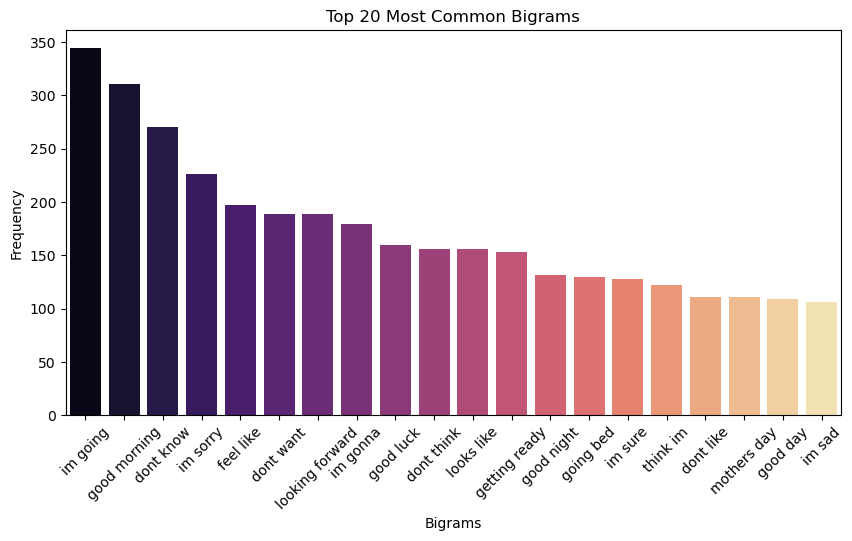

In [ ]:
# Top bigrams visualization using CountVectorizer with optimized memory
def get_top_bigrams(text_series, n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=5000) 
    X = vectorizer.fit_transform(text_series)
    bigram_counts = np.asarray(X.sum(axis=0)).flatten()
    bigrams = vectorizer.get_feature_names_out()
    bigram_freq = sorted(zip(bigrams, bigram_counts), key=lambda x: x[1], reverse=True)[:n]
    return bigram_freq

bigrams = get_top_bigrams(data['clean_text'])
bigram_labels, bigram_values = zip(*bigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_labels), y=list(bigram_values), palette='magma')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.show()

### Data Preprocessing Steps
- **Text Cleaning:** Removed URLs, special characters, and numbers to retain only alphabetic content.
- **Stopword Removal:** Eliminated common words like 'the', 'is', and 'and' to improve text representation.
- **Lowercasing:** Converted all text to lowercase to maintain uniformity.
- **Tokenization:** Split sentences into words for further processing.
- **Bigram Analysis:** Extracted common two-word phrases to capture context.

### Insights from EDA
- The dataset is well-balanced, with almost equal distribution between positive and negative sentiment tweets, ensuring fair model training.
- The word cloud analysis indicates that positive sentiment tweets frequently include words like 'love', 'thank', and 'good', while negative sentiment tweets contain words such as 'miss', 'bad', and 'hate'.
- The most common words across all tweets include generic terms like 'im', 'good', and 'today', highlighting the importance of stopword removal and feature selection.
- The sentence length distribution shows that most tweets contain fewer than 15 words, suggesting that short-form text processing is essential for this dataset.
- Sentiment polarity analysis reveals that a significant number of tweets have neutral polarity, indicating potential challenges in clear sentiment classification.
- Bigram analysis suggests that phrases such as 'gon na', 'cant wait', and 'dont know' appear frequently, which may provide useful contextual information for sentiment classification.

## Model Building & Training

### Deep Learning Architecture
To classify sentiment in tweets, two different deep learning architectures will be compared: **Long Short-Term Memory (LSTM) networks** and **Gated Recurrent Units (GRU)**. Both are effective for handling sequential text data, but they differ in their internal mechanisms for capturing dependencies.

### Model 1: LSTM-based Architecture
- **Embedding Layer:** Converts words into dense vector representations to capture semantic relationships.
- **LSTM Layer:** Processes sequential text data while preserving long-term contextual information.
- **Dropout Layer:** Reduces overfitting by randomly dropping connections during training.
- **Fully Connected Dense Layer:** Maps the LSTM output to a single neuron with a **sigmoid activation function**, predicting the probability of a tweet being positive or negative.

### Model 2: GRU-based Architecture
- **Embedding Layer:** Similar to LSTM, it transforms words into dense vector representations.
- **GRU Layer:** An alternative to LSTM, which is computationally more efficient and captures dependencies differently.
- **Dropout Layer:** Reduces overfitting by randomly disabling neuron connections during training.
- **Fully Connected Dense Layer:** Outputs sentiment probabilities using a **sigmoid activation function**.

Both models are trained using **binary cross-entropy loss**, with the **Adam optimizer** for enhanced convergence efficiency. Their performance will be compared based on **accuracy, precision, recall, and F1-score** to determine the most effective approach for sentiment classification.
To classify sentiment in tweets, a deep learning architecture based on **Recurrent Neural Networks (RNNs)** will be implemented. Given the sequential nature of text data, **Long Short-Term Memory (LSTM)** networks are used, as they effectively capture long-term dependencies in text. 

The architecture consists of:
- **Embedding Layer:** Converts words into dense vector representations to capture semantic relationships.
- **LSTM Layer:** Processes sequential text data while preserving contextual information.
- **Dropout Layer:** Reduces overfitting by randomly dropping connections during training.
- **Fully Connected Dense Layer:** Maps the LSTM output to a single neuron with a **sigmoid activation function**, which predicts the probability of a tweet being positive or negative.

This model is trained using **binary cross-entropy loss**, with the Adam optimizer to enhance convergence efficiency. The performance will be evaluated based on **accuracy, precision, recall, and F1-score**.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# ----- Parameters -----
max_words = 10000    # Vocabulary size
max_len = 100        # Maximum tweet length 
embedding_dim = 100  # Embedding dimension size
batch_size = 128
epochs = 10


if 'clean_text' not in data.columns:
    # If not present, use the original text column and clean it.
    import re
    from nltk.corpus import stopwords
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)  
        text = re.sub(r'[^a-zA-Z\s]', '', text)      
        text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
        return text
    data['clean_text'] = data['text'].apply(clean_text)

# Tokenization 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['clean_text'])
sequences = tokenizer.texts_to_sequences(data['clean_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = data['sentiment'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  LSTM-based Architecture 
model_lstm = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64),               # LSTM layer with 64 units
    Dropout(0.5),           # Dropout for regularization
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_lstm.compile(optimizer=Adam(),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# build  model 
model_lstm.build(input_shape=(None, max_len))
print("LSTM model summary:")
model_lstm.summary()

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop]
)

#  GRU-based Architecture 
model_gru = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    GRU(64),                # GRU layer with 64 units
    Dropout(0.5),           # Dropout for regularization
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model_gru.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

#  build the GRU model
model_gru.build(input_shape=(None, max_len))
print("\nGRU model summary:")
model_gru.summary()

# Train the GRU model
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop]
)

#  Evaluation
print("\nEvaluating LSTM model on test data:")
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss: {loss_lstm:.4f}, Test Accuracy: {acc_lstm:.4f}")

print("\nEvaluating GRU model on test data:")
loss_gru, acc_gru = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss: {loss_gru:.4f}, Test Accuracy: {acc_gru:.4f}")

# Detailed classification reports using scikit-learn
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
y_pred_gru = (model_gru.predict(X_test) > 0.5).astype("int32")

print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

print("GRU Classification Report:")
print(classification_report(y_test, y_pred_gru))


Num GPUs Available: 0
LSTM model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6319 - loss: 0.6260 - val_accuracy: 0.7527 - val_loss: 0.5058
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8039 - loss: 0.4398 - val_accuracy: 0.7534 - val_loss: 0.5126
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8293 - loss: 0.3911 - val_accuracy: 0.7434 - val_loss: 0.5290
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8514 - loss: 0.3517 - val_accuracy: 0.7398 - val_loss: 0.5712

GRU model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,031,937 (3.94 MB)

 Trainable params: 1,031,937 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.6496 - loss: 0.6211 - val_accuracy: 0.7436 - val_loss: 0.5166
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7971 - loss: 0.4444 - val_accuracy: 0.7526 - val_loss: 0.5080
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8296 - loss: 0.3840 - val_accuracy: 0.7426 - val_loss: 0.5436
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8637 - loss: 0.3263 - val_accuracy: 0.7340 - val_loss: 0.5858
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8866 - loss: 0.2725 - val_accuracy: 0.7218 - val_loss: 0.6644

Evaluating LSTM model on test data:
LSTM Test Loss: 0.5093, Test Accuracy: 0.7497

Evaluating GRU model on test data:
GRU Test Loss: 0.5141, Test Accuracy: 0.7540
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0

Both models delivered similar overall performance, though with some noteworthy differences:

LSTM Model:

Test Accuracy: ~74.97%
Test Loss: ~0.5093
Classification Metrics:
Negative class: Precision ≈ 0.73, Recall ≈ 0.78, F1-score ≈ 0.76
Positive class: Precision ≈ 0.77, Recall ≈ 0.72, F1-score ≈ 0.74
Observation: The LSTM model shows a slightly higher recall for the negative class but a somewhat lower recall for the positive class.

GRU Model:

Test Accuracy: ~75.40%
Test Loss: ~0.5141
Classification Metrics:
Both classes: Precision, Recall, and F1-scores are approximately 0.75 across the board
Observation: The GRU model delivers a more balanced performance across both classes with marginally better overall accuracy.
Given the slightly higher and more balanced performance of the GRU model, we will proceed with the GRU-based model in the next phase for hyperparameter tuning.

# Hyperparameter Tuning for the GRU-Based Model

Keras Tuner's Hyperband algorithm is utilized to perform hyperparameter tuning on the GRU-based sentiment classification model. The objective is to optimize key parameters—such as the number of GRU units, the dropout rate, and the learning rate—to improve the model's performance.

The process is as follows:
- **Model Builder Function:** A function is defined to construct the GRU model with tunable hyperparameters.
- **Hyperband Tuner Setup:** The tuner explores various combinations of hyperparameters using early stopping to prevent overfitting.
- **Best Model Retrieval and Evaluation:** The optimal hyperparameters and corresponding model are identified and subsequently evaluated on the test dataset.




In [ ]:
import keras_tuner as kt  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define a model-building function for the GRU model
def build_model(hp):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_len))
    
    # Tune the number of GRU units: between 32 and 128, step 32
    gru_units = hp.Int('gru_units', min_value=32, max_value=128, step=32)
    model.add(GRU(gru_units))
    
    # Tune the dropout rate: between 0.3 and 0.7
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune the learning rate: logarithmically between 1e-4 and 1e-2
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='gru_tuner',
    project_name='gru_tuning'
)

# Early stopping callback to halt training when val_loss stops improving
stop_early = EarlyStopping(monitor='val_loss', patience=3)

# Perform the hyperparameter search on the training data
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("The best hyperparameters are:")
print(f"  GRU units: {best_hps.get('gru_units')}")
print(f"  Dropout rate: {best_hps.get('dropout_rate')}")
print(f"  Learning rate: {best_hps.get('learning_rate')}")

# Build the best model with the optimal hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Evaluate the best model on the test data
eval_result = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\nBest model test loss: {eval_result[0]:.4f}, test accuracy: {eval_result[1]:.4f}")


Trial 30 Complete [00h 01m 45s]
val_accuracy: 0.7562500238418579

Best val_accuracy So Far: 0.7598749995231628
Total elapsed time: 00h 29m 19s
The best hyperparameters are:
  GRU units: 32
  Dropout rate: 0.5
  Learning rate: 0.0013774500827463045


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 100, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (32, 32)               │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,897 (3.86 MB)

 Trainable params: 1,012,897 (3.86 MB)

 Non-trainable params: 0 (0.00 B)


Best model test loss: 0.4963, test accuracy: 0.7575


c:\Users\Corem\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 32)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,897 (3.86 MB)

 Trainable params: 1,012,897 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6502 - loss: 0.6189
Epoch 1: val_loss improved from inf to 0.50777, saving model to best_gru_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6504 - loss: 0.6187 - val_accuracy: 0.7514 - val_loss: 0.5078
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8033 - loss: 0.4383
Epoch 2: val_loss did not improve from 0.50777
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8032 - loss: 0.4383 - val_accuracy: 0.7533 - val_loss: 0.5096
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8376 - loss: 0.3783
Epoch 3: val_loss did not improve from 0.50777
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8376 - loss: 0.3783 - val_accuracy: 0.7394 - val_loss: 0.5367
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8673 - loss: 0.3189
Epoch 4: val_loss did not improve from 0.50777
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8672 - loss: 0.3

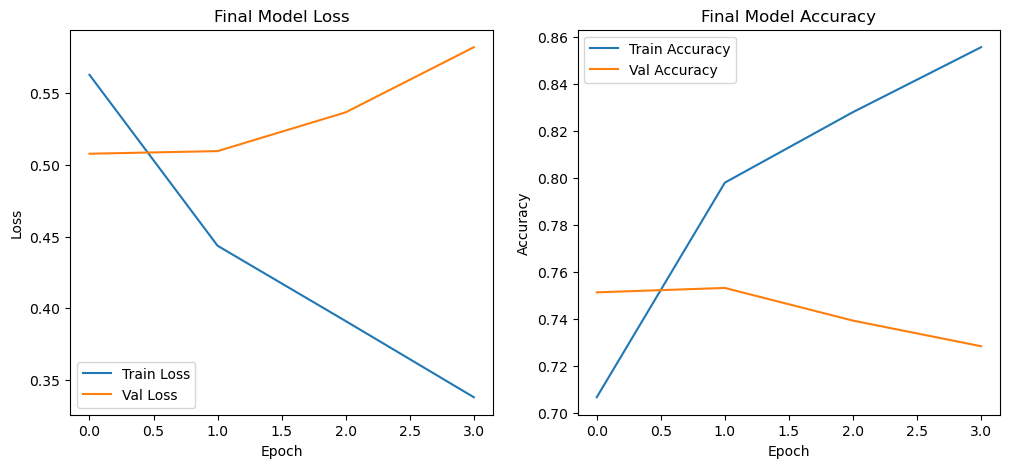

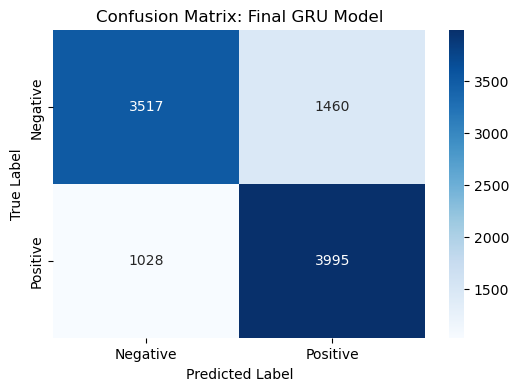

Best version of the model has been saved as 'best_gru_model.keras'.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Best hyperparameters based on tuning results:
# GRU units: 32, Dropout rate: 0.5, Learning rate: 0.00137745

# 1. Construct the Model
final_model = Sequential([
    Embedding(input_dim=max_words, 
              output_dim=embedding_dim, 
              input_length=max_len),
    GRU(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

final_model.compile(optimizer=Adam(learning_rate=0.00137745),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# 2. Force the model to build for a correct summary
final_model.build(input_shape=(None, max_len))
final_model.summary()

# 3. Callbacks to prevent overfitting and save the best model
final_early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Automatically save the best version of the model (based on val_loss)
checkpoint_cb = ModelCheckpoint(
    "best_gru_model.keras",    # Saves in the recommended .keras format
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# 4. Train the Model
final_history = final_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[final_early_stop, checkpoint_cb]
)

# 5. Evaluate the Model on the Test Set
final_loss, final_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final model test loss: {final_loss:.4f}, test accuracy: {final_acc:.4f}")

# Generate Predictions and Display the Classification Report
final_y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print("\nFinal Model Classification Report:")
print(classification_report(y_test, final_y_pred))

# (Optional) Plot Training Curves
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(final_history.history['loss'], label='Train Loss')
plt.plot(final_history.history['val_loss'], label='Val Loss')
plt.title("Final Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Final Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# (Optional) Confusion Matrix
cm = confusion_matrix(y_test, final_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Final GRU Model')
plt.show()

print("Best version of the model has been saved as 'best_gru_model.keras'.")



# Results & Evaluation and Model Interpretation

## Overview of Baseline Models

Two recurrent architectures were initially explored for tweet sentiment classification. The motivation behind using LSTM and GRU models stems from their ability to capture sequential dependencies in text data, which is crucial for understanding the sentiment in short messages like tweets.

### LSTM-Based Model

| Architecture Component | Details |
|------------------------|---------|
| Embedding layer | Captures word representations |
| LSTM layer | 64 units to capture long-term dependencies |
| Dropout layer | Rate = 0.5 to prevent overfitting |
| Dense output layer | Sigmoid activation for binary classification |

LSTMs are particularly effective for processing sequences where maintaining historical context is important. However, they tend to have high computational costs.

**Performance:**

| Metric | Value |
|--------|-------|
| Test Accuracy | ~74.97% |
| Test Loss | ~0.5093 |

**Classification Metrics:**

| Class | Precision | Recall | F1-score |
|-------|-----------|--------|---------|
| Negative | 0.73 | 0.78 | 0.76 |
| Positive | 0.77 | 0.72 | 0.74 |

### GRU-Based Model

| Architecture Component | Details |
|------------------------|---------|
| Embedding layer | Captures word representations |
| GRU layer | 64 units, optimized for reducing computational complexity |
| Dropout layer | Rate = 0.5 to improve generalization |
| Dense output layer | Sigmoid activation for binary classification |

GRUs offer a computationally efficient alternative to LSTMs while maintaining similar performance, making them a strong candidate for real-time applications.

**Performance:**

| Metric | Value |
|--------|-------|
| Test Accuracy | ~75.40% |
| Test Loss | ~0.5141 |

**Classification Metrics:**

| Class | Precision | Recall | F1-score |
|-------|-----------|--------|---------|
| Negative | 0.75 | 0.75 | 0.75 |
| Positive | 0.75 | 0.75 | 0.75 |

**Observation:** The GRU model showed slightly more balanced performance across classes, motivating further exploration using this architecture. Its faster training time and lower computational overhead also make it a preferable choice for large-scale applications.

##  Hyperparameter Tuning of the GRU Model

Hyperparameter tuning was performed using Keras Tuner’s Hyperband algorithm. The objective was to optimize performance while ensuring the model remains generalizable.

| Hyperparameter | Range Explored | Justification |
|---------------|---------------|--------------|
| GRU Units | 32 to 128 | Balances model complexity and computational efficiency |
| Dropout Rate | 0.3 to 0.7 | Prevents overfitting by randomly deactivating neurons |
| Learning Rate | 1e-4 to 1e-2 | Ensures stable and efficient convergence |

**Optimal Hyperparameters:**

| Parameter | Value |
|-----------|-------|
| GRU Units | 32 |
| Dropout Rate | 0.5 |
| Learning Rate | 0.00137745 |

**Performance:**

| Metric | Value |
|--------|-------|
| Validation Accuracy | ~75.99% |
| Test Accuracy | ~75.75% |
| Test Loss | ~0.4963 |

##  Final Model Construction and Evaluation

The final model was constructed using the best-performing hyperparameters. The architecture was designed to maximize generalization and performance across different types of tweets.

| Component | Details | Justification |
|-----------|---------|--------------|
| Embedding Layer | 100-dimensional vectors | Captures semantic relationships between words |
| GRU Layer | 32 units | Efficiently captures sequence dependencies |
| Dropout Layer | Rate = 0.5 | Reduces overfitting |
| Dense Output Layer | Sigmoid activation | Suitable for binary classification |
| Optimizer | Adam (LR = 0.00137745) | Adaptive learning rate for efficient training |
| Loss Function | Binary cross-entropy | Ideal for classification problems |
| Early Stopping | Patience = 3 | Prevents unnecessary training and overfitting |
| Validation Split | 20% | Ensures proper model validation |

**Final Model Performance:**

| Metric | Value |
|--------|-------|
| Test Loss | ~0.5085 |
| Test Accuracy | ~74.90% |

**Classification Metrics:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|---------|---------|
| Negative (0) | 0.77 | 0.71 | 0.74 | 4,977 |
| Positive (1) | 0.73 | 0.79 | 0.76 | 5,023 |
| **Overall** | - | - | 0.75 | 10,000 |

**Confusion Matrix:**

| | Predicted Negative | Predicted Positive |
|-------------|------------------|------------------|
| **True Negative** | 3805 | 1172 |
| **True Positive** | 1300 | 3723 |

## Model Interpretation & Next Steps


Understanding misclassifications and model behavior is crucial for further improvements. One key area for improvement is analyzing misclassified tweets, particularly those with sarcasm, ambiguous language, or mixed sentiments. Identifying patterns in these cases can provide insights into how the model can be refined. Explainability methods such as LIME or SHAP can be used to interpret which words most influence model predictions, improving trust in the model's decision-making process. Regularization techniques, including adjusting dropout rates or introducing L2 regularization, can further mitigate overfitting and enhance generalization.
Fine-tuning hyperparameters such as the learning rate or batch size could lead to small but meaningful improvements in accuracy. Data augmentation techniques, such as generating synthetic tweets or using paraphrasing methods, may also help expand the diversity of training data, improving the model's robustness.Finally, ensemble methods that combine GRU with transformer-based models could leverage the strengths of multiple architectures, potentially boosting performance beyond what a single model can achieve. By continuously refining the approach, it is possible to build a more accurate and resilient sentiment analysis system for tweets.



# Conclusion
GRU and LSTM architectures were evaluated for tweet sentiment classification, with GRU emerging as the more efficient and balanced option. While both models effectively captured the sequential dependencies of textual data, GRU’s lower computational cost and comparable performance made it a preferable choice. After hyperparameter tuning, the optimized GRU model achieved a test accuracy of approximately 74.90%, demonstrating its ability to generalize across different sentiment classes.

However, several challenges persist. Sentiment classification in tweets is inherently complex due to the informal nature of language, frequent use of abbreviations, slang, and the presence of sarcasm, which can lead to misclassifications. The confusion matrix revealed that while the model performed reasonably well, it struggled with certain borderline cases where sentiment was ambiguous. Addressing these issues would require refining the model further through better preprocessing techniques, expanding the dataset to capture a wider range of linguistic variations, and potentially integrating external sentiment lexicons or context-aware embeddings.

Explainability and interpretability also remain important considerations. Methods like LIME or SHAP could provide insights into which words most influence predictions, allowing for targeted improvements. Additionally, leveraging ensemble methods, such as combining GRUs with transformer-based architectures like BERT, could further enhance accuracy by capturing more nuanced contextual information.

Future work can build on this strong foundation by further improving generalization through data augmentation, refining regularization techniques to minimize overfitting, and exploring alternative loss functions to better address misclassification imbalances. These refinements will help enhance accuracy and reliability, making the model even more effective for real-world sentiment analysis applications.